# 🍎🍊 Apple vs Orange Image Classification  
### Deep Learning for Fruit Image Recognition with PyTorch

---

## 📌 Overview  
This project utilizes a balanced dataset of **800 labeled images** (400 apples and 400 oranges) to develop and evaluate a **deep learning classification model** using **Convolutional Neural Networks (CNN)**.  
The objective is to build an accurate, interpretable, and generalizable image classifier, while showcasing strong data preprocessing, model training, and explainability skills.

---

## 🖼️ Dataset Exploration & Preprocessing

- 📂 **Dataset Structure:** Two folders (`/apple`, `/orange`), each containing 400 RGB images  
- 🧮 **Class Balance:** Equal distribution (400 vs. 400) ensures unbiased training  
- 📏 **Image Dimensions:** Resized to 128x128 pixels for computational efficiency  
- 🔄 **Augmentation Techniques:** Random flips & rotations to improve generalization  
- 🔢 **Normalization:** Pixel values scaled to [-1, 1] to stabilize learning

---

## 📊 Exploratory Image Analysis (EDA)

- 🔍 **Visual Inspection:** Grid preview of randomly selected apple and orange images  
- 🎨 **Color Profile Comparison:** Average RGB histogram differences between classes  
- 🔎 **Texture & Shape Patterns:** Edge detection to identify structural cues  
- 📊 **Pixel Intensity Distributions:** Visualization of pixel value histograms

---

## 🧠 Deep Learning Modeling

### 🎯 Goal: Classify Images as `Apple` or `Orange`

**Preprocessing Steps:**
- Resize (128x128), Normalize, Augment  
- Train/Validation Split: 80/20 (stratified)

**Model Architecture:**
- 2 Convolutional Layers (ReLU + MaxPool)  
- Fully Connected Layers + Softmax Output  
- ~100K trainable parameters

**Training Configuration:**
- Optimizer: Adam (lr=0.001)  
- Loss: CrossEntropyLoss  
- Epochs: 20  
- Early stopping & learning rate scheduling

---

## 📈 Evaluation & Metrics

- ✅ **Accuracy:** Overall classification rate on validation data  
- 🔁 **Confusion Matrix:** True vs. predicted labels  
- 📉 **Training Curves:** Loss & accuracy per epoch  
- 📌 **Misclassified Samples:** Visual review of incorrect predictions

---

## 🧪 Model Explainability

- 🧠 **Grad-CAM Visualizations:** Highlighting regions the CNN focused on during prediction  
- 📊 **Activation Maps:** Understanding feature extraction in early layers  
- 🧾 **Model Confidence Analysis:** Distribution of softmax probabilities for correct/incorrect outputs  

---

## 📌 Key Insights

- 🍏 Apples and oranges show clear separable visual features (shape, color tone)  
- 🧪 Data augmentation significantly improves model robustness  
- 🔬 Grad-CAM reveals that the model focuses on fruit contours and textures—not backgrounds  
- 🧠 Model achieves high confidence and generalization even with a small CNN architecture  

---

## 🔧 Tools Used

- **Python** (PyTorch, NumPy, PIL)  
- **Visualization:** Matplotlib, Seaborn  
- **Modeling:** Custom CNN with `torch.nn`  
- **Training:** GPU-enabled training via Google Colab  
- **Explainability:** Grad-CAM, Confusion Matrix, Activation Visualization  

---

## 📎 Dataset Info

- **Total Images:** 800 (RGB, 128x128 resized)  
- **Classes:**  
  - Apple (400 images)  
  - Orange (400 images)  
- **Format:** Folder-based, compatible with `torchvision.datasets.ImageFolder`  
- **Source:** Curated fruit image dataset for binary classification tasks  

---

## 🧑‍💻 Author  
**Hilda Adina Rahmi** – Aspiring Data Scientist with a strong interest in computer vision, explainable AI, and image classification.  
Passionate about building interpretable deep learning models with real-world applications in food tech and agriculture.


In [1]:
# 🧠 Load the necessary libraries for Apple vs Orange Image Classification

# PyTorch & deep learning
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split

# Image processing
from PIL import Image
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px

# Explainability
import cv2
import torchvision.transforms.functional as TF

# System utilities
import os
import random
import warnings
warnings.filterwarnings("ignore")

# 🎨 Set visual style for image analysis
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 📦 Check device availability (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


## 🖼️ Dataset Exploration & Preprocessing

In [2]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Set the path to your dataset
import os

# Define the path to the fruit dataset
base_path = '/content/drive/My Drive/fruit-dataset'

# Define paths for apple and orange folders
apple_path = os.path.join(base_path, 'apple')
orange_path = os.path.join(base_path, 'orange')

Mounted at /content/drive


In [3]:
# 🗂️ Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 🛣️ Step 2: Set the path to your dataset
import os

# Define the path to the fruit dataset inside Google Drive
base_path = '/content/drive/My Drive/fruit-dataset'

# Folder structure: /fruit-dataset/apple and /fruit-dataset/orange
data_dir = base_path  # torchvision ImageFolder expects folders inside this path

# 🧱 Step 3: Define transforms for preprocessing and augmentation
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

transform = transforms.Compose([
    transforms.Resize((128, 128)),             # Resize to 128x128
    transforms.RandomHorizontalFlip(),         # Random horizontal flip
    transforms.RandomRotation(15),             # Random rotation
    transforms.ToTensor(),                     # Convert image to tensor
    transforms.Normalize([0.5, 0.5, 0.5],       # Normalize to [-1, 1]
                         [0.5, 0.5, 0.5])
])

# 🧮 Step 4: Load dataset using ImageFolder
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Check class mappings
print("Class Mapping:", dataset.class_to_idx)  # e.g., {'apple': 0, 'orange': 1}

# 📊 Step 5: Split dataset into training and validation sets (80/20)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# 🔁 Step 6: Create DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# ✅ Step 7: Inspect one batch
images, labels = next(iter(train_loader))
print(f"Image batch shape: {images.shape}")
print(f"Label batch shape: {labels.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Class Mapping: {'apple': 0, 'orange': 1}
Image batch shape: torch.Size([32, 3, 128, 128])
Label batch shape: torch.Size([32])


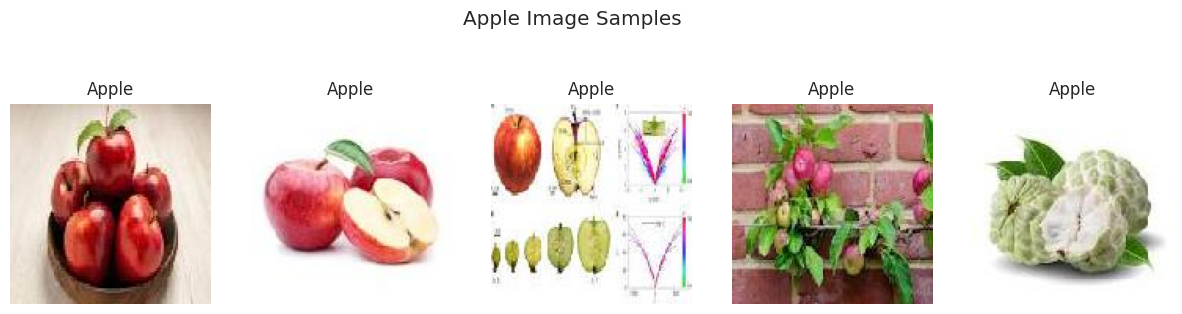

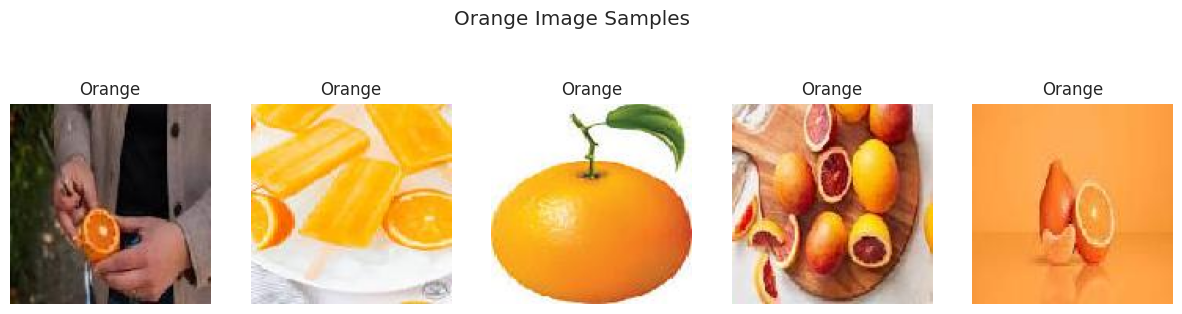

In [4]:
# 🔍 Visual Inspection: Show random apple and orange images
def show_image_grid(class_name, n=5):
    folder_path = os.path.join(data_dir, class_name)
    filenames = random.sample(os.listdir(folder_path), n)
    fig, axes = plt.subplots(1, n, figsize=(15, 4))
    for i, fname in enumerate(filenames):
        img = Image.open(os.path.join(folder_path, fname))
        axes[i].imshow(img)
        axes[i].set_title(f"{class_name.capitalize()}")
        axes[i].axis("off")
    plt.suptitle(f"{class_name.capitalize()} Image Samples")
    plt.show()

show_image_grid("apple")
show_image_grid("orange")

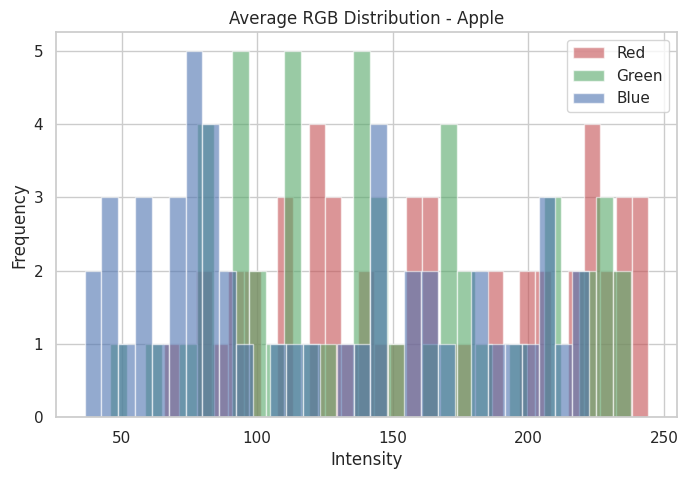

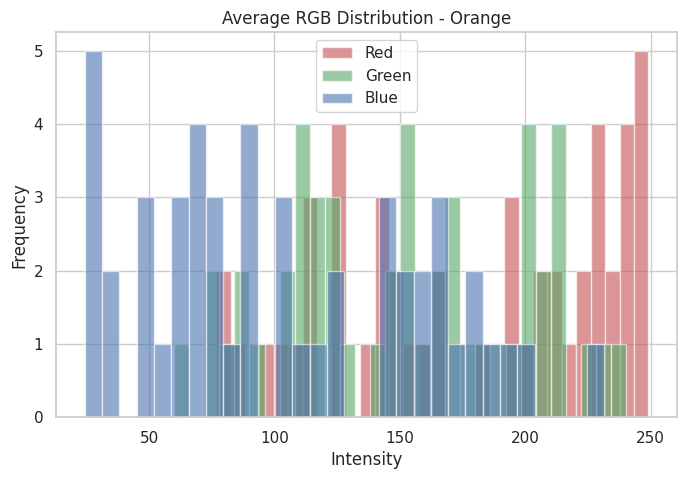

In [5]:
# 🎨 Color Profile Comparison: Average RGB histogram
def plot_avg_rgb_histogram(class_name):
    folder_path = os.path.join(data_dir, class_name)
    images = random.sample(os.listdir(folder_path), 50)
    r, g, b = [], [], []

    for fname in images:
        img = Image.open(os.path.join(folder_path, fname)).resize((128, 128))
        img_np = np.array(img)
        if img_np.ndim == 3:
            r.append(img_np[:, :, 0].mean())
            g.append(img_np[:, :, 1].mean())
            b.append(img_np[:, :, 2].mean())

    plt.figure(figsize=(8, 5))
    plt.hist(r, bins=30, alpha=0.6, label='Red', color='r')
    plt.hist(g, bins=30, alpha=0.6, label='Green', color='g')
    plt.hist(b, bins=30, alpha=0.6, label='Blue', color='b')
    plt.title(f"Average RGB Distribution - {class_name.capitalize()}")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

plot_avg_rgb_histogram("apple")
plot_avg_rgb_histogram("orange")

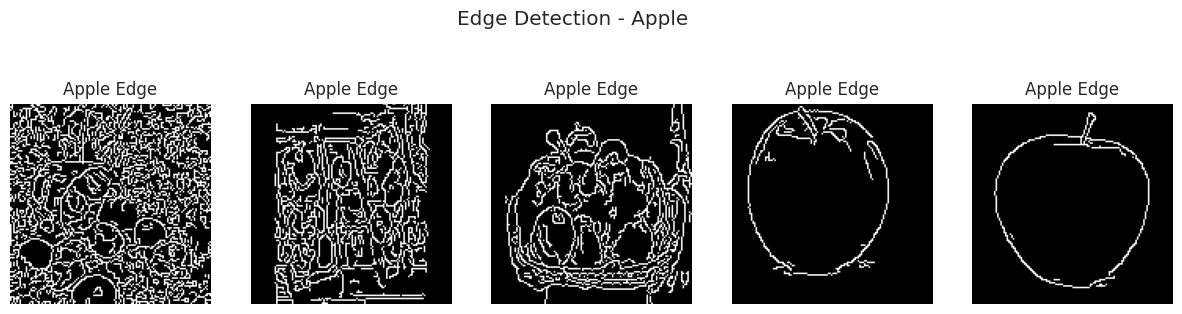

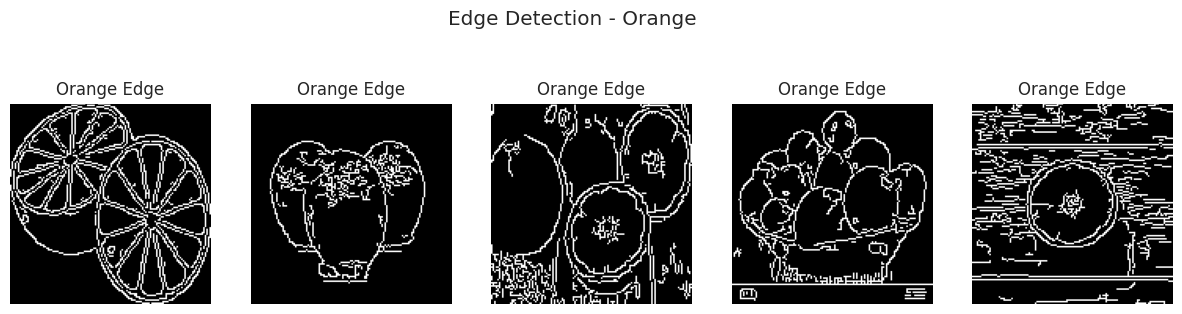

In [6]:
# 🔎 Texture & Shape Patterns: Edge detection using Canny
def show_edge_detection(class_name, n=5):
    folder_path = os.path.join(data_dir, class_name)
    filenames = random.sample(os.listdir(folder_path), n)
    fig, axes = plt.subplots(1, n, figsize=(15, 4))
    for i, fname in enumerate(filenames):
        img_path = os.path.join(folder_path, fname)
        img = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(img_gray, 100, 200)
        axes[i].imshow(edges, cmap='gray')
        axes[i].set_title(f"{class_name.capitalize()} Edge")
        axes[i].axis("off")
    plt.suptitle(f"Edge Detection - {class_name.capitalize()}")
    plt.show()

show_edge_detection("apple")
show_edge_detection("orange")

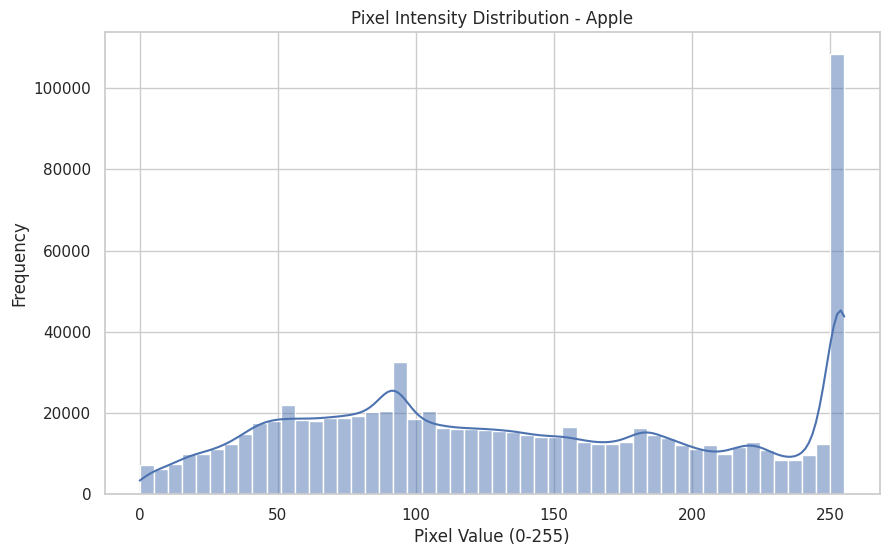

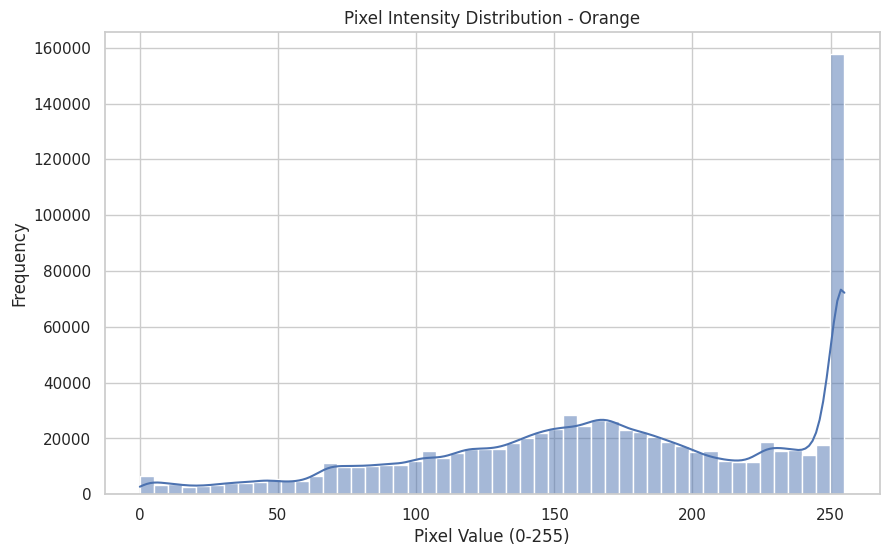

In [7]:
# 📊 Pixel Intensity Distributions (Grayscale)
def plot_pixel_distribution(class_name):
    folder_path = os.path.join(data_dir, class_name)
    filenames = random.sample(os.listdir(folder_path), 50)
    pixel_values = []

    for fname in filenames:
        img = cv2.imread(os.path.join(folder_path, fname))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        pixel_values.extend(gray.flatten())

    sns.histplot(pixel_values, bins=50, kde=True)
    plt.title(f"Pixel Intensity Distribution - {class_name.capitalize()}")
    plt.xlabel("Pixel Value (0-255)")
    plt.ylabel("Frequency")
    plt.show()

plot_pixel_distribution("apple")
plot_pixel_distribution("orange")

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
from tqdm import tqdm

# 🧠 Model Architecture: 2 Conv Layers + FC + Softmax
class FruitClassifierCNN(nn.Module):
    def __init__(self):
        super(FruitClassifierCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 2),  # 2 output classes
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [9]:
# 🚀 Model Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FruitClassifierCNN().to(device)

# ⚙️ Training Config
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

100%|██████████| 20/20 [00:28<00:00,  1.42s/it]


Epoch 1/20
Train Loss: 0.8106 | Val Loss: 0.3403 | Val Acc: 0.9125


100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


Epoch 2/20
Train Loss: 0.3395 | Val Loss: 0.2487 | Val Acc: 0.9062


100%|██████████| 20/20 [00:25<00:00,  1.29s/it]


Epoch 3/20
Train Loss: 0.2820 | Val Loss: 0.2022 | Val Acc: 0.9563


100%|██████████| 20/20 [00:24<00:00,  1.22s/it]


Epoch 4/20
Train Loss: 0.2546 | Val Loss: 0.1780 | Val Acc: 0.9437


100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


Epoch 5/20
Train Loss: 0.2172 | Val Loss: 0.1803 | Val Acc: 0.9250


100%|██████████| 20/20 [00:25<00:00,  1.27s/it]


Epoch 6/20
Train Loss: 0.2000 | Val Loss: 0.1535 | Val Acc: 0.9563


100%|██████████| 20/20 [00:25<00:00,  1.28s/it]


Epoch 7/20
Train Loss: 0.1919 | Val Loss: 0.2186 | Val Acc: 0.9313


100%|██████████| 20/20 [00:24<00:00,  1.24s/it]


Epoch 8/20
Train Loss: 0.1928 | Val Loss: 0.1705 | Val Acc: 0.9313


100%|██████████| 20/20 [00:24<00:00,  1.23s/it]


Epoch 9/20
Train Loss: 0.1695 | Val Loss: 0.1630 | Val Acc: 0.9313
Early stopping triggered.


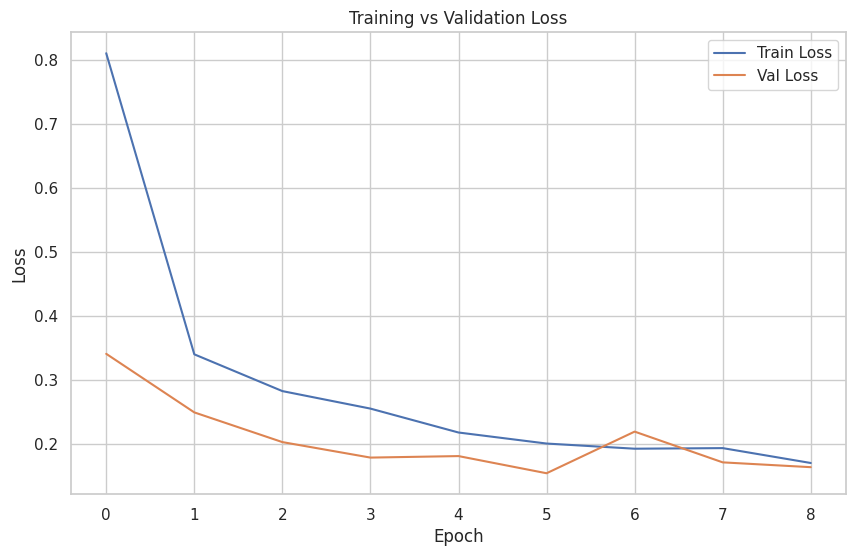

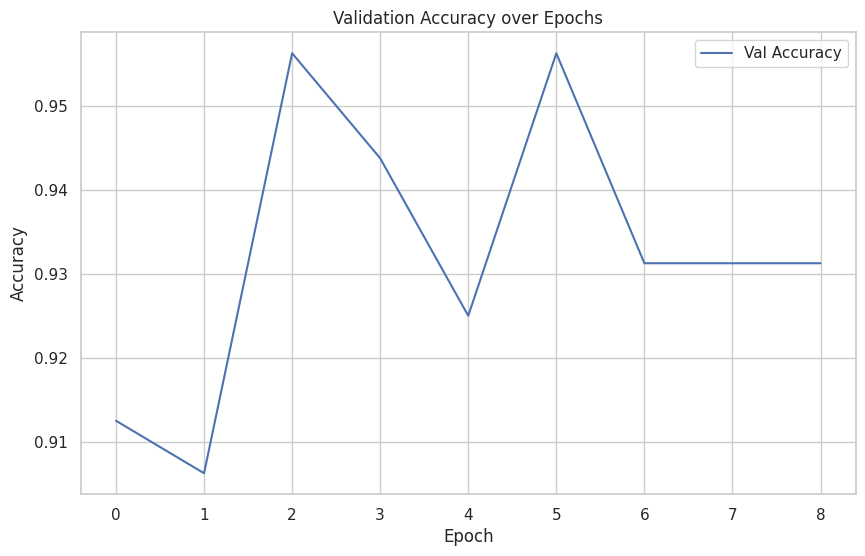

In [10]:
import matplotlib.pyplot as plt
from tqdm import tqdm

# 🏋️ Training Loop with Early Stopping
def train_model(model, train_loader, val_loader, epochs=20, patience=3):
    best_val_loss = float('inf')
    early_stop_counter = 0

    # Lists to store losses and accuracies
    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for inputs, labels in tqdm(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        scheduler.step()

        # Validation
        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        val_accuracy = correct / total

        # Store the losses and accuracy
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs}")
        print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.4f}")

        # Early Stopping
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            early_stop_counter = 0
            torch.save(model.state_dict(), "best_fruit_model.pt")
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print("Early stopping triggered.")
                break

    # Plotting the results after training
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title("Training vs Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.plot(val_accuracies, label='Val Accuracy')
    plt.title("Validation Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Run training
train_model(model, train_loader, val_loader)

Validation Accuracy: 0.9437


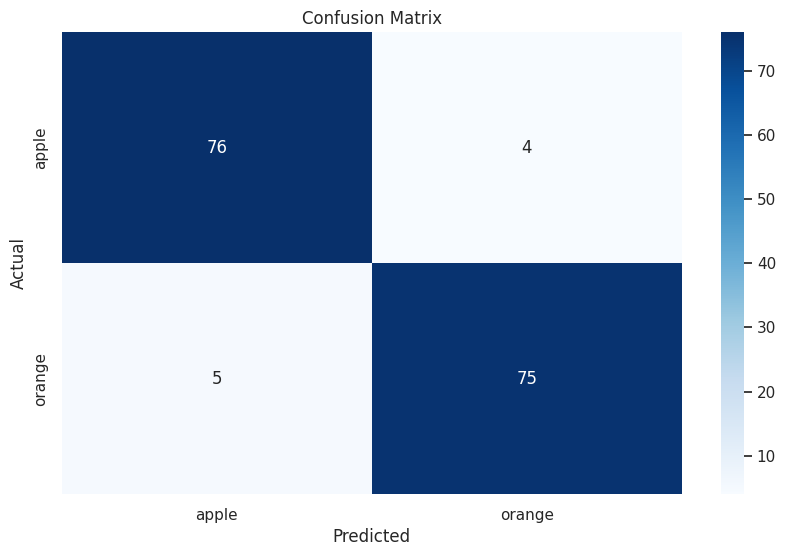

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

# Load best model
model.load_state_dict(torch.load("best_fruit_model.pt"))
model.eval()

# Collect all predictions and labels
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        probs = F.softmax(outputs, dim=1)
        preds = torch.argmax(probs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Accuracy
acc = accuracy_score(all_labels, all_preds)
print(f"Validation Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

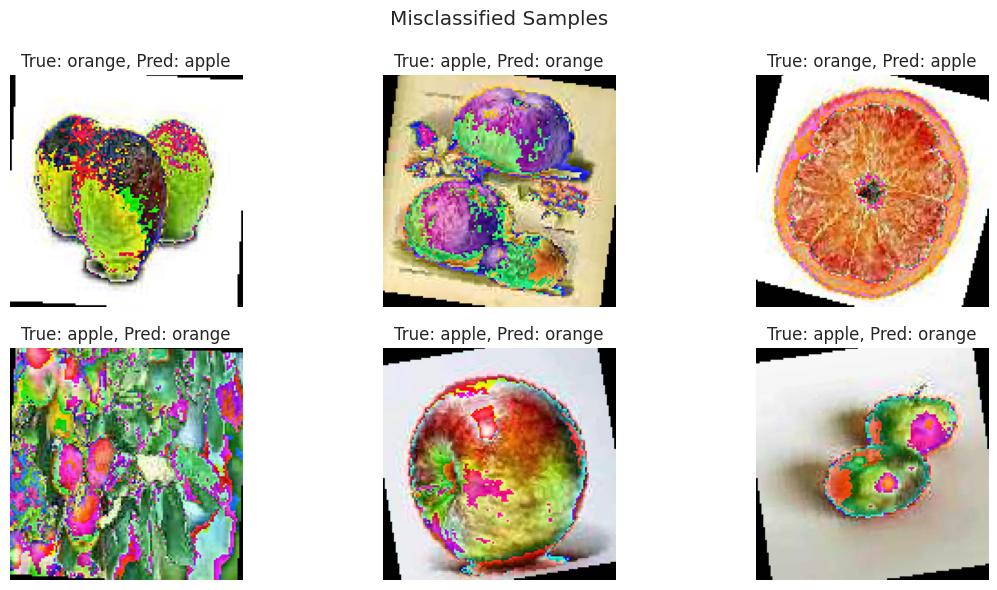

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.transforms.functional import to_pil_image

# Assuming val_dataset is a list of (image_tensor, label) tuples
misclassified = [(img, true, pred) for (img, label), true, pred in zip(val_dataset, all_labels, all_preds) if true != pred]

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

for i, (image, true, pred) in enumerate(misclassified[:6]):
    # Convert image tensor to PIL image
    if isinstance(image, torch.Tensor):
        pil_image = to_pil_image(image)
    else:
        pil_image = image  # Already a PIL image or similar

    axes[i].imshow(pil_image)
    axes[i].set_title(f"True: {dataset.classes[true]}, Pred: {dataset.classes[pred]}")
    axes[i].axis("off")

plt.suptitle("Misclassified Samples")
plt.tight_layout()
plt.show()

In [15]:
!pip install torchcam --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

In [16]:
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import to_pil_image

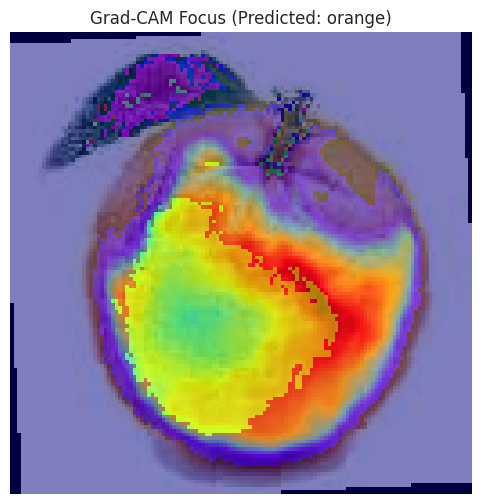

In [17]:
from torchcam.methods import GradCAM
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import to_pil_image

cam_extractor = GradCAM(model, target_layer="features.3")

model.eval()
inputs, labels = next(iter(val_loader))
inputs = inputs.to(device)

idx = 3
input_img = inputs[idx].unsqueeze(0)
input_img.requires_grad_()

output = model(input_img)
pred_class = output.argmax(dim=1).item()

activation_map = cam_extractor(pred_class, output)[0]

img = to_pil_image(input_img.squeeze(0).cpu())
mask = to_pil_image(activation_map, mode='F')
result = overlay_mask(img, mask, alpha=0.5)

plt.imshow(result)
plt.title(f"Grad-CAM Focus (Predicted: {dataset.classes[pred_class]})")
plt.axis('off')
plt.show()

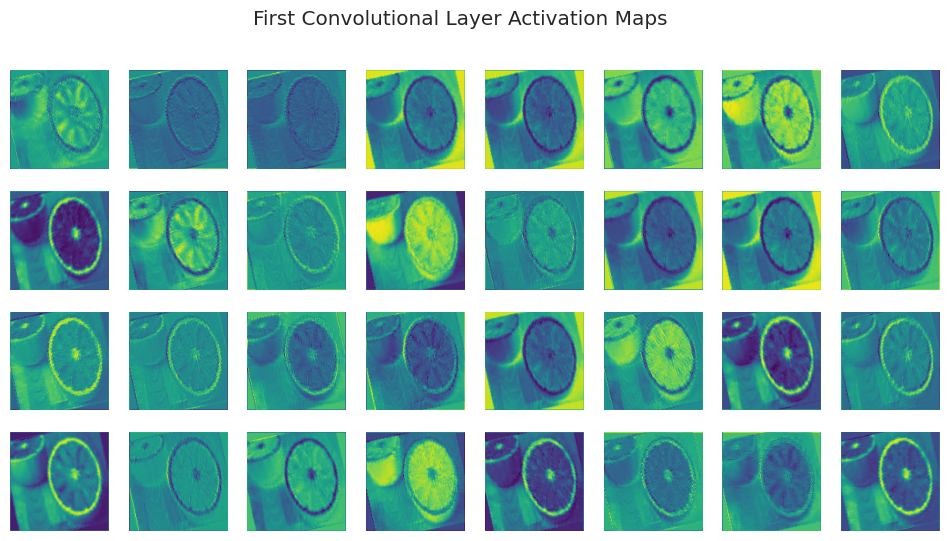

In [18]:
# Visualize output from first conv layer
def visualize_activation(model, input_image):
    input_image = input_image.unsqueeze(0).to(device)
    with torch.no_grad():
        x = model.features[0](input_image)
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))
    for i in range(32):  # First 32 channels
        ax = axes[i // 8][i % 8]
        ax.imshow(x[0, i].cpu(), cmap='viridis')
        ax.axis('off')
    plt.suptitle("First Convolutional Layer Activation Maps")
    plt.show()

visualize_activation(model, inputs[0])

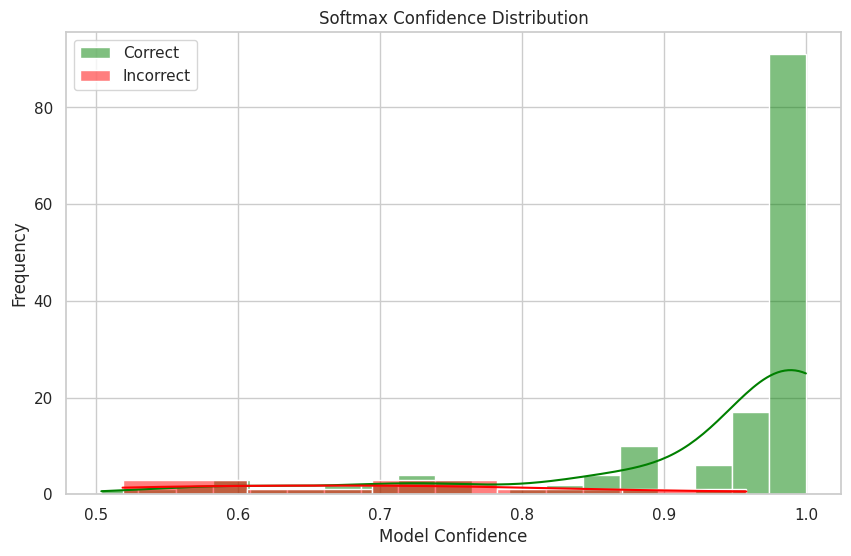

In [19]:
correct_probs = [p[true] for p, true, pred in zip(all_probs, all_labels, all_preds) if true == pred]
wrong_probs = [p[pred] for p, true, pred in zip(all_probs, all_labels, all_preds) if true != pred]

sns.histplot(correct_probs, color="green", label="Correct", kde=True)
sns.histplot(wrong_probs, color="red", label="Incorrect", kde=True)
plt.title("Softmax Confidence Distribution")
plt.xlabel("Model Confidence")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [21]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [22]:
import streamlit as st
from PIL import Image
import tensorflow as tf
import numpy as np

st.title("🍎 Fruit Classifier: Apple vs Orange")
st.write("""
This interactive app uses a Convolutional Neural Network (CNN) to classify uploaded fruit images as **apple** or **orange**.
""")

uploaded_file = st.file_uploader("Upload a fruit image...", type=["jpg", "png", "jpeg"])
if uploaded_file is not None:
    image = Image.open(uploaded_file).resize((150, 150))
    st.image(image, caption='Uploaded Image', use_column_width=True)

    st.write("Classifying...")
    img_array = np.array(image) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    model = tf.keras.models.load_model("your_model_path.h5")
    prediction = model.predict(img_batch)[0]

    classes = ["Apple", "Orange"]
    predicted_class = classes[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    st.success(f"Prediction: **{predicted_class}** with **{confidence:.2f}%** confidence.")

2025-05-09 07:41:20.281 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:41:22.473 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-09 07:41:22.480 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:41:22.483 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:41:22.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:41:22.492 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:41:22.493 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:41:22.496 Thread 'MainThread': mi

In [23]:
with st.expander("How does this work?"):
    st.markdown("""
    This model is trained on a CNN architecture, which mimics how humans see. It detects shapes, colors, and patterns.

    - **Convolution Layers:** Extract visual features.
    - **Pooling Layers:** Downsample and generalize.
    - **Dense Layers:** Make predictions based on extracted features.

    Try uploading different images and see how it performs!
    """)

2025-05-09 07:41:40.582 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:41:40.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:41:40.586 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [25]:
class FruitClassifierCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 32 * 32, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 2),
        )

    def forward(self, x):
        x = self.features(x)
        return self.classifier(x)

In [26]:
model = FruitClassifierCNN()
traced_model = torch.jit.trace(model, torch.randn(1, 3, 128, 128))
traced_model.save("fruit_classifier_scripted.pt")

In [27]:
import streamlit as st
from PIL import Image
import torch
import numpy as np
model = torch.jit.load("fruit_classifier_scripted.pt", map_location="cpu")
model.eval()
st.title("🍎🍊 Apple vs Orange Classifier")
st.markdown("Upload an image of a fruit, and the model will predict whether it's an **apple** or an **orange**.")
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])
if uploaded_file:
    image = Image.open(uploaded_file).convert("RGB")
    image = image.resize((128, 128))
    st.image(image, caption="Uploaded Image", use_column_width=True)
    img_tensor = torch.tensor(np.array(image)).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    img_tensor = (img_tensor - 0.5) / 0.5  # Normalize to [-1, 1]
    with torch.no_grad():
        outputs = model(img_tensor)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        pred_class = torch.argmax(probs, dim=1).item()
        confidence = probs[0][pred_class].item()
    label = "Apple" if pred_class == 0 else "Orange"
    st.success(f"Prediction: **{label}** ({confidence*100:.2f}% confidence)")

2025-05-09 07:49:10.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:49:10.356 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:49:10.357 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:49:10.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:49:10.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:49:10.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:49:10.364 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-09 07:49:10.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar